In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
with open('./Data/InfAct_plus/2d/primitive/InfAct_plus.pkl', 'rb') as f:
    infact_ds = pickle.load(f)

In [3]:
youtube_ds = [item for item in infact_ds['annotations'] if 'youtube' in item['source']]
career_ds = [item for item in infact_ds['annotations'] if 'CAREER' in item['source']]

youtube_poses = [item['pos_label'] for item in youtube_ds]
career_poses = [item['pos_label'] for item in career_ds]

youtube_lengths = np.array([item['total_frames'] for item in youtube_ds])
career_lengths = np.array([item['total_frames'] for item in career_ds])

In [4]:
sum(career_lengths>200)

137

In [5]:
yt_ul, yt_ul_c = np.unique(youtube_poses, return_counts=True)
ca_ul, ca_ul_c = np.unique(career_poses, return_counts=True)

In [6]:
def set_ax_borders(ax, top, right, bottom, left):
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['bottom'].set_visible(bottom)
    ax.spines['left'].set_visible(left)

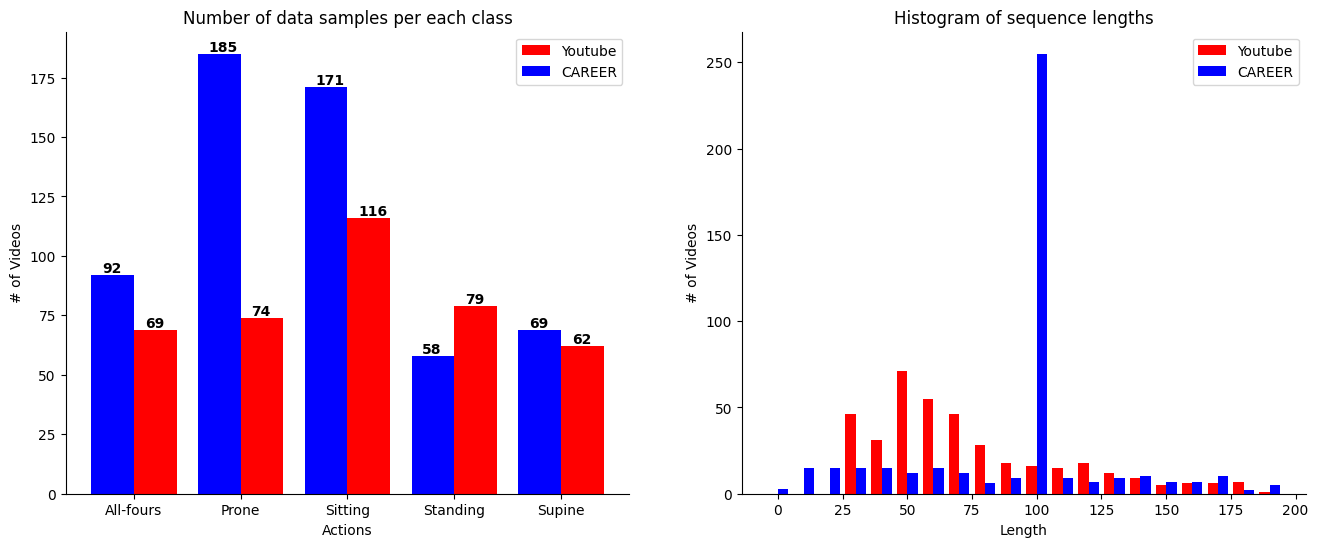

In [7]:
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(16,6)

width=0.4
ind = np.arange(len(yt_ul))

axes[0].bar(ind, yt_ul_c, color='red', width=width, align='edge', label='Youtube')
axes[0].bar(ind, ca_ul_c, color='blue', width=-width, align='edge', label='CAREER')

axes[0].set_xticks(ind)
axes[0].set_xticklabels(yt_ul, minor=False)

for i, (yt_v,ca_v) in enumerate(zip(yt_ul_c, ca_ul_c)):
    axes[0].text(i+width/4, yt_v+1, str(yt_v), color='black', fontweight='bold')
    axes[0].text(i-3*width/4, ca_v+1, str(ca_v), color='black', fontweight='bold')

set_ax_borders(axes[0], False, False, True, True)
axes[0].legend()
axes[0].set_xlabel('Actions')
axes[0].set_ylabel('# of Videos')
axes[0].set_title('Number of data samples per each class')

bin_length = 10
bins = np.arange(0,201,bin_length)
axes[1].hist([youtube_lengths, career_lengths], bins=bins-bin_length/2, color=['red', 'blue'], label=['Youtube', 'CAREER'])
set_ax_borders(axes[1], False, False, True, True)
axes[1].legend()
axes[1].set_xlabel('Length')
axes[1].set_ylabel('# of Videos')
axes[1].set_title('Histogram of sequence lengths')

plt.show()


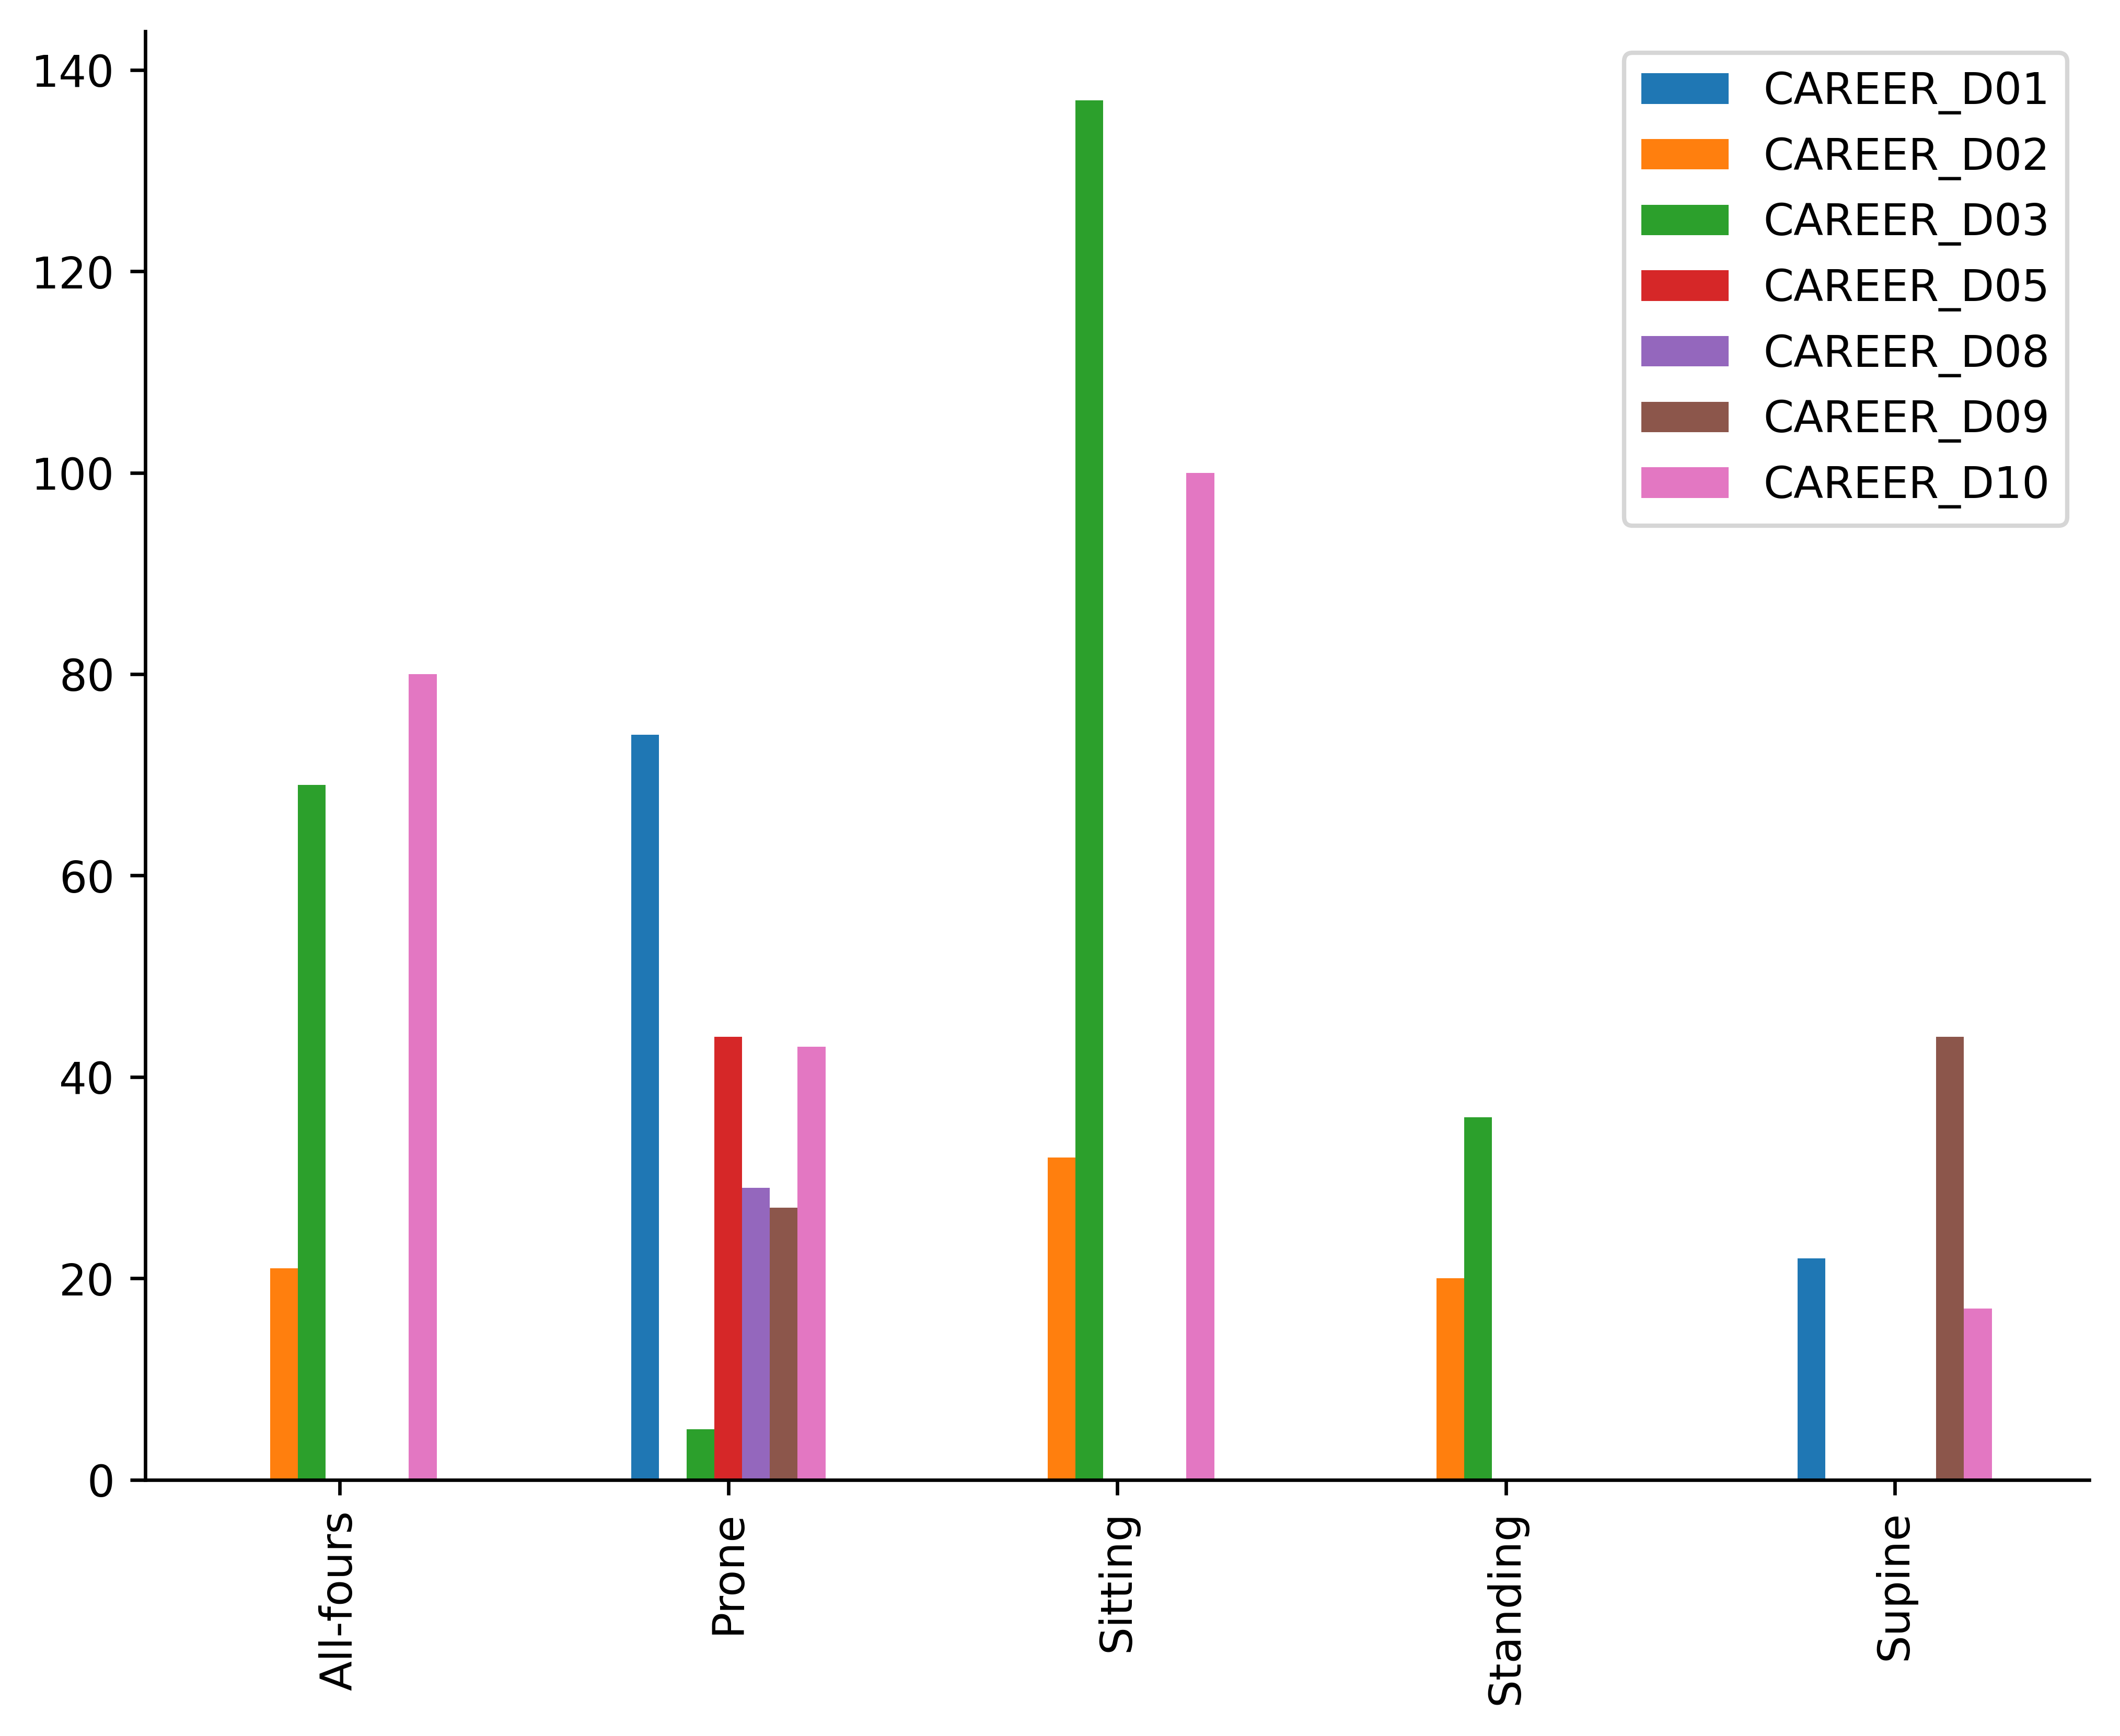

In [8]:
def set_ax_borders(ax, top, right, bottom, left):
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['bottom'].set_visible(bottom)
    ax.spines['left'].set_visible(left)

with open('./Data/InfAct_plus/2d/primitive/InfAct_plus.pkl', 'rb') as f:
    infact_ds_V1 = pickle.load(f)

with open('./Data/InfAct_plus/2d/primitive/InfAct_plus_V2.pkl', 'rb') as f:
    infact_ds_V2 = pickle.load(f)

V1_p_d = [(item['source'], item['pos_label']) for item in infact_ds_V1['annotations'] if 'CAREER' in item['source']]
V2_p_d = [(item['source'], item['pos_label']) for item in infact_ds_V2['annotations'] if 'CAREER' in item['source']]

p_d = [*V1_p_d , *V2_p_d]

subs = np.unique([item[0] for item in p_d])

action_per_subjet = {sub: {} for sub in subs}

for item in p_d:
    sub = item[0]
    pos = item[1]
    if pos not in action_per_subjet[sub]:
        action_per_subjet[sub][pos]=0
    else:
        action_per_subjet[sub][pos]+=1

import pandas as pd
df = pd.DataFrame(action_per_subjet)
df = df.T
df = df.fillna(0)
df = df[['All-fours', 'Prone', 'Sitting', 'Standing', 'Supine']]

fig, ax = plt.subplots()
fig.set_size_inches(8,6)
fig.set_dpi(600)
df.T.plot.bar(ax=ax)
set_ax_borders(ax, False, False, True, True)